In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install scikit-plot

In [3]:
import scikitplot as skplt

In [4]:
# Load data set and convert into dataframe
data = pd.read_csv('titanic_train[1].csv') 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
pd.set_option('display.max.rows',None)

In [7]:
# Check summary
data.shape

(891, 12)

we observed that there are  rows 891 and 12 coloumns

In [8]:
# Check datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#1. we need to  convert some objects to integers for a proper analysis.
#2. Removing some Non-correlated datas will help in efficient data analysis.

In [10]:
# Check missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

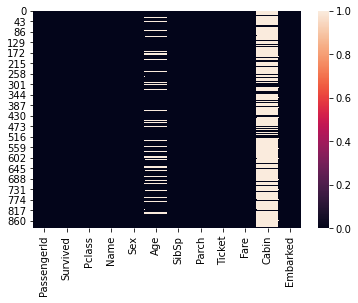

In [11]:
sns.heatmap(data.isna())
plt.show()

Missing values found in the columns "Age",'Embarked' and "Cabin".

In [12]:
# Statistics Summary
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


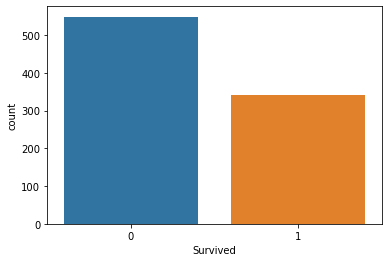

In [13]:
sns.countplot(data['Survived'])
plt.show()

We observed that the number of survivors is very less compared to the unsurvivors

In [14]:
print('UnSurvived : 0  ----------', data.Survived.value_counts()[0])
print('Survived : 1 -------------', data.Survived.value_counts()[1])

UnSurvived : 0  ---------- 549
Survived : 1 ------------- 342


In [15]:
# Convert string into numerical datatype
data['Sex'].replace('Female',0,inplace = True)
data['Sex'].replace('Male',1,inplace = True)


<AxesSubplot:xlabel='Sex', ylabel='count'>

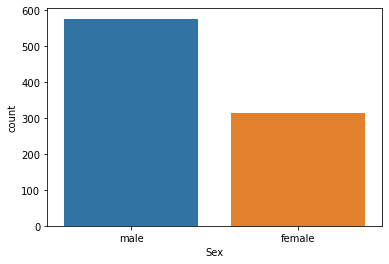

In [16]:
sns.countplot(data['Sex'])

we observed that male passenger higher than female

In [17]:
# fillna with mean value of age
data['Age'].fillna(data['Age'].mean(), inplace = True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

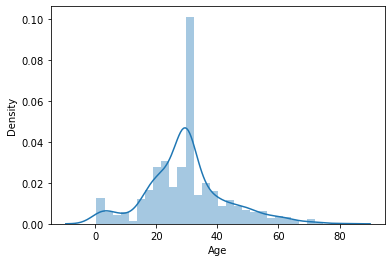

In [18]:
sns.distplot(data['Age'])

we observed that average age is between(25-35) 

In [19]:
#we observed that age feature look like a normal distribution

<AxesSubplot:xlabel='Survived', ylabel='count'>

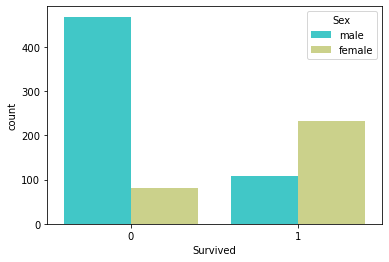

In [20]:
sns.countplot(x='Survived',hue = 'Sex', data=data, palette='rainbow')

we observed that female has higer survived rate

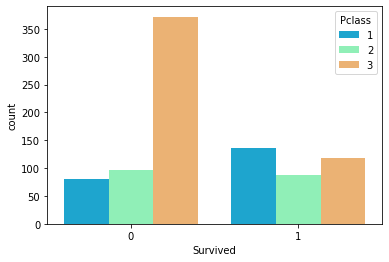

In [21]:
sns.countplot(x="Survived",hue="Pclass",data=data,palette="rainbow")
plt.show()

we observed that Unsurvived rate for 3rd class passengers is high than other.

<AxesSubplot:xlabel='Survived', ylabel='count'>

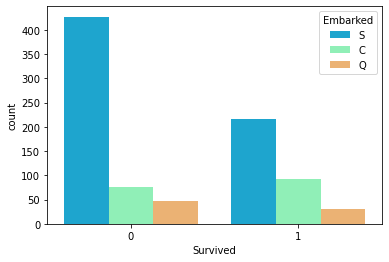

In [22]:
sns.countplot(x="Survived",hue="Embarked",data=data,palette="rainbow")

In [23]:
#we observed that passengers embarked from 'Port S' is higher UnSurvived  and Survived rate.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

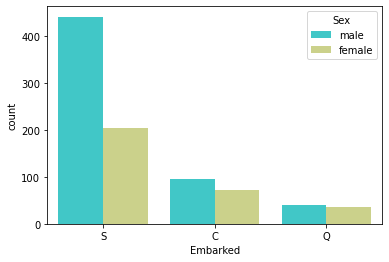

In [24]:
sns.countplot(x="Embarked",hue="Sex",data=data,palette="rainbow")

we observed that most of the passengers are men who have embarked from 'Port S'

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

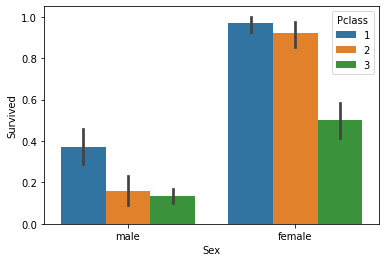

In [25]:
sns.barplot(x='Sex',y='Survived',hue='Pclass', data=data)

we observed most of the passengers form 1st class are women,Thus we observe that Sex have higher relation with survived passengers.


In [26]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

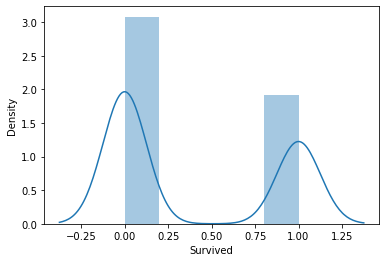

In [27]:
sns.distplot(data['Survived'])
plt.show()

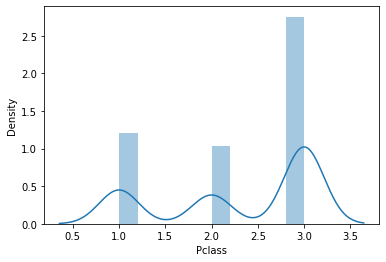

In [28]:
sns.distplot(data['Pclass'])
plt.show()

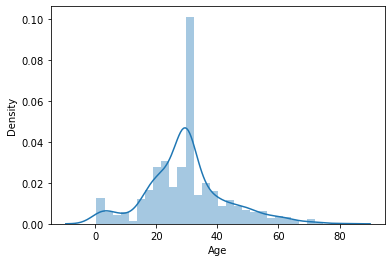

In [29]:
sns.distplot(data['Age'])
plt.show()

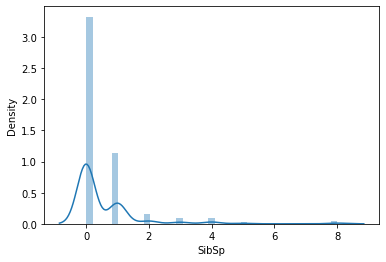

In [30]:
sns.distplot(data['SibSp'])
plt.show()

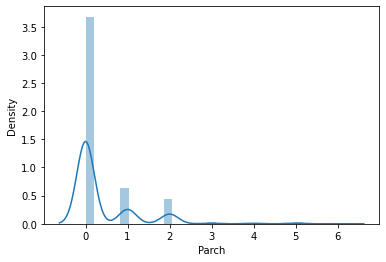

In [31]:
sns.distplot(data['Parch'])
plt.show()

In [32]:
# Check correlation
cor = data.corr()
cor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


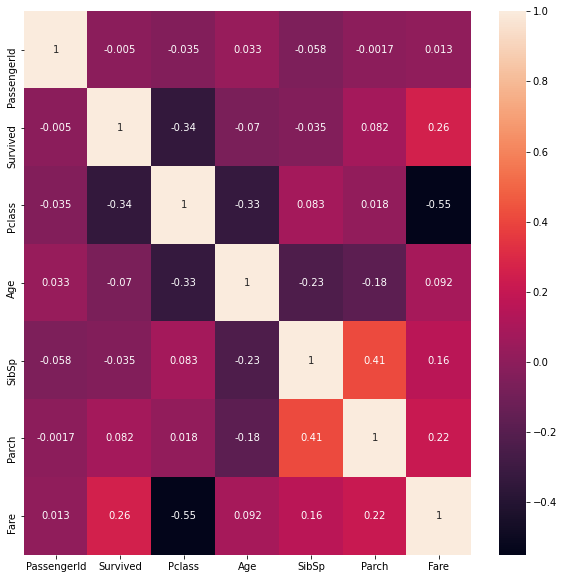

In [33]:
# Check correaltion with help of heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)
plt.show()

we observed that PassengerId, Fare not a strong relationship we label

In [34]:
#Shape of correlation
print ('Correlation matrix Shape =  ', cor.shape)

Correlation matrix Shape =   (7, 7)


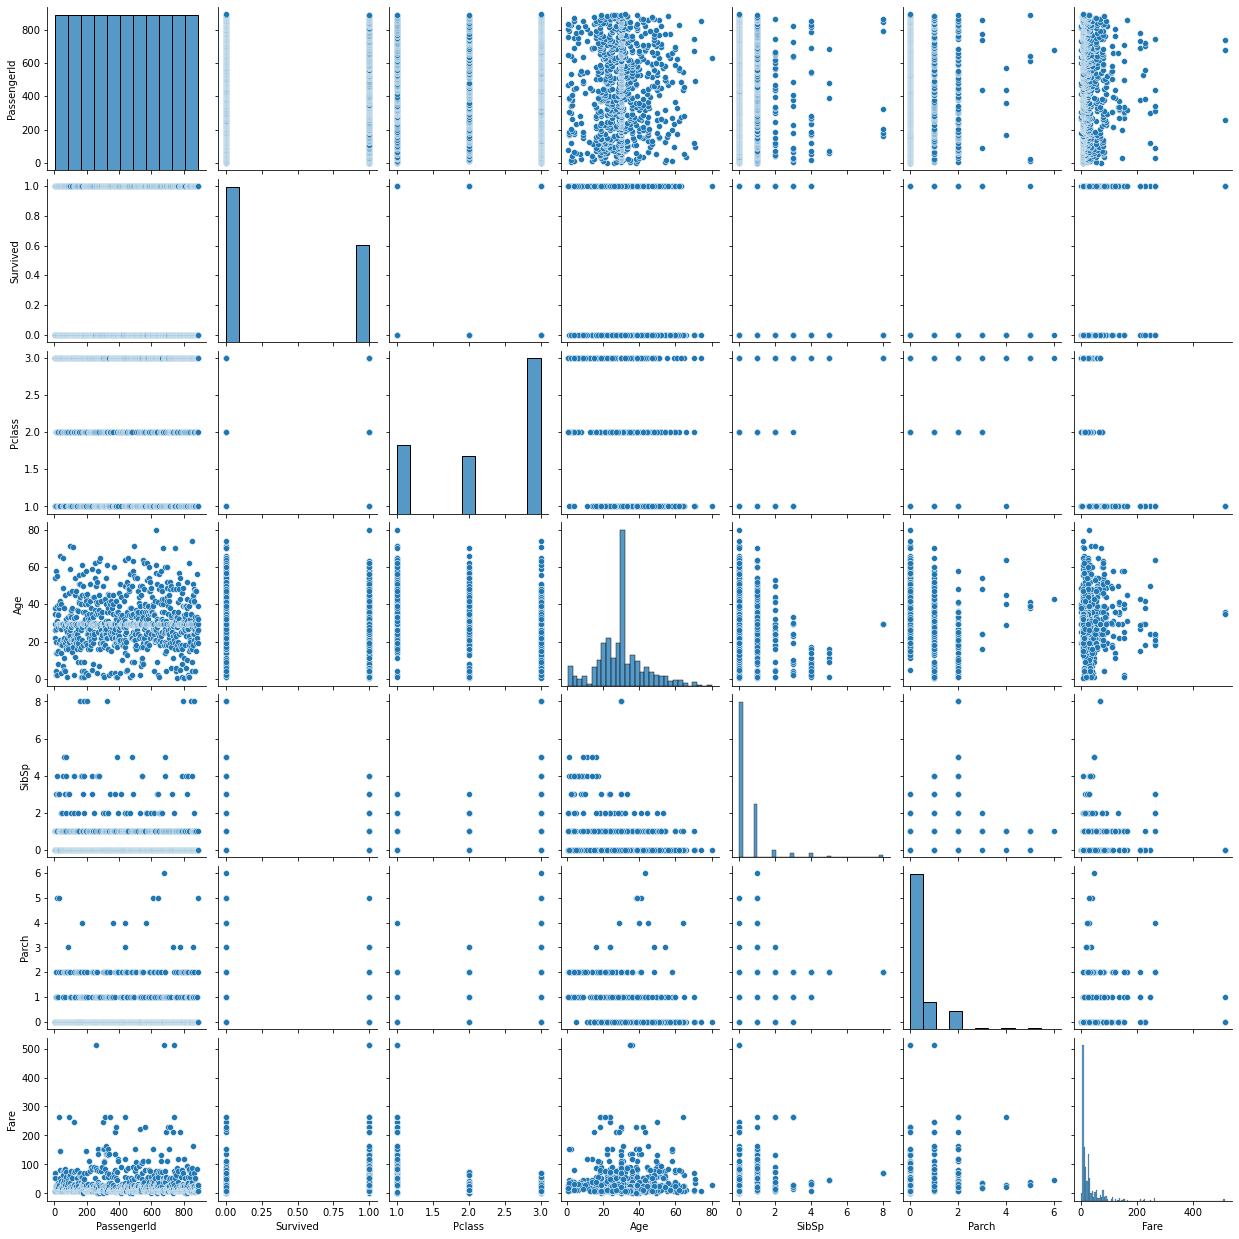

In [35]:
sns.pairplot(data)
plt.show()

After analysing Columns such as 'PassengerId','Cabin','Ticket','Name','Fare','Embarked' do not add values, so we are dropping.    


In [36]:
data.drop(columns=['PassengerId','Cabin','Ticket','Name','Fare','Embarked'],axis=1,inplace=True)

In [37]:
data.columns


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [38]:
data.shape

(891, 6)

In [39]:
data["Sex"]=data["Sex"].map({"male":1,"female":0}).astype(int)

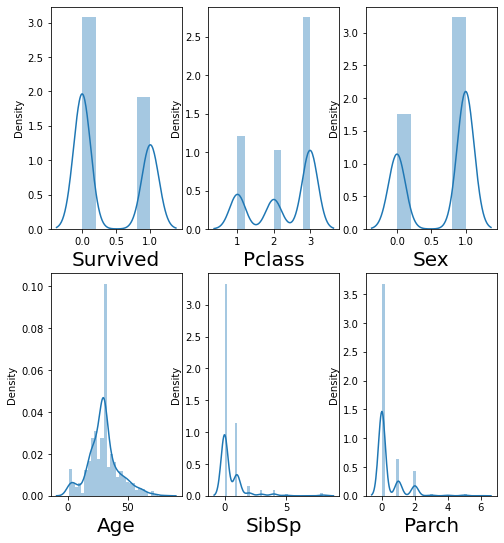

In [40]:
# Now we check how data is disturbuted
plt.figure(figsize=(8,9), facecolor='white')
plotnumber=1
for columns in data:
    if plotnumber <=6:
        plt.subplot(2,3,plotnumber)
        sns.distplot(data[columns])
        plt.xlabel(columns,fontsize=20)
        plotnumber+=1
plt.show()

In [41]:
data.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
dtype: float64

we observed there some skewness in our dataset

In [42]:
from scipy import stats
import numpy as np

In [43]:
Z = np.abs(stats.zscore(data))

In [44]:
threshold=3
X_new=data[(Z<3).all(axis=1)]
X_new

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.000000,1,0
1,1,1,0,38.000000,1,0
2,1,3,0,26.000000,0,0
3,1,1,0,35.000000,1,0
4,0,3,1,35.000000,0,0
5,0,3,1,29.699118,0,0
6,0,1,1,54.000000,0,0
7,0,3,1,2.000000,3,1
8,1,3,0,27.000000,0,2
9,1,2,0,14.000000,1,0


In [45]:
X_new.skew()

Survived    0.417114
Pclass     -0.568482
Sex        -0.633677
Age         0.321028
SibSp       2.012240
Parch       2.039356
dtype: float64

In [46]:
X_new = data.drop('Survived', axis = 1)
y = data['Survived']

In [47]:
from sklearn.preprocessing import power_transform
X = power_transform(X_new)
X =pd.DataFrame(X,columns= X_new.columns)


In [48]:
X.skew()

Pclass   -0.441438
Sex      -0.618921
Age       0.064420
SibSp     0.808608
Parch     1.228795
dtype: float64

In [49]:
# we are able to build model

In [50]:
# standard scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [51]:
# Split dataset into two parts 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaler, y, test_size = 0.25, random_state = 44)

In [52]:
# Logistic model for training
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(x_train,y_train)

log_score =log.score(x_train,y_train)

print ('Logistic training Score ==>', log_score)

Logistic training Score ==> 0.8278443113772455


In [53]:
# Importing test set for prediction
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_auc_score,plot_roc_curve,roc_curve,r2_score
from sklearn.model_selection import cross_val_score

log_pred = log.predict(x_test)

log_cfm=confusion_matrix(y_test,log_pred)

print("Testing accuracy :", accuracy_score(y_test, log_pred))

print(classification_report(y_test,log_pred))



Testing accuracy : 0.7533632286995515
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       138
           1       0.67      0.68      0.68        85

    accuracy                           0.75       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.75      0.75      0.75       223



##### Conclusion : LogisticRegression model has 75% score .

##### Cross Validation score to check if the model is overfitting 

In [54]:
cvs=cross_val_score(LogisticRegression(),X,y,cv=5).mean()
print("Cross_validation_score ----------",cvs)

Cross_validation_score ---------- 0.7934781244115248


##### Conclusion : LogisticRegression model has 79% Cross Validation score 

In [55]:
# Knn Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)

knn_score = knn.score(x_train,y_train)

print ('KNeighborsClassifier training Score ==>', knn_score)

KNeighborsClassifier training Score ==> 0.8712574850299402


In [56]:
# Importing test set for prediction

knn_pred = knn.predict(x_test)

knn_cfm=confusion_matrix(y_test,knn_pred)

print("Testing accuracy :", accuracy_score(y_test,knn_pred))

print(classification_report(y_test,knn_pred))


Testing accuracy : 0.7802690582959642
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       138
           1       0.72      0.69      0.71        85

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223



##### Conclusion : KNeighborsClassifier model has 78% score .

##### Cross Validation score to check if the model is overfitting 

In [57]:
knn_cvs = cross_val_score(KNeighborsClassifier(),X,y,cv=5).mean()

print("Cross_validation_score ----------",knn_cvs)

Cross_validation_score ---------- 0.8070240411775783


##### Conclusion : KNeighborsClassifier model has 80% Cross Validation score 

In [58]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree.fit(x_train, y_train)

dt_score = (decision_tree.score(x_train, y_train))

print('Decision Tree training Score ==>',dt_score)

Decision Tree training Score ==> 0.9416167664670658


In [59]:
# Importing test set for prediction

dt_pred = decision_tree.predict(x_test)

dt_cfm=confusion_matrix(y_test,dt_pred)

print("Testing accuracy :", accuracy_score(y_test,dt_pred))

print(classification_report(y_test,dt_pred))



Testing accuracy : 0.7219730941704036
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       138
           1       0.64      0.64      0.64        85

    accuracy                           0.72       223
   macro avg       0.71      0.71      0.71       223
weighted avg       0.72      0.72      0.72       223



#### Conclusion : DecisionTreeClassifier model has 72% score .

##### Cross Validation score to check if the model is overfitting 

In [60]:
dt_cvs = cross_val_score(DecisionTreeClassifier(),X,y,cv=5).mean()

print("Cross_validation_score ----------",dt_cvs)

Cross_validation_score ---------- 0.8081099742640137


##### Conclusion : DecisionTreeClassifier model has 80% cross validation score

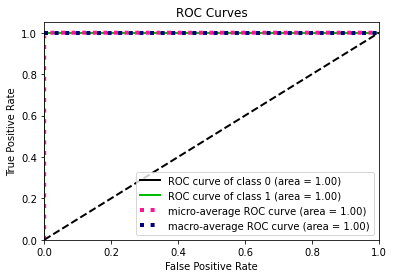

In [61]:
# First calculate probability
prob = decision_tree.predict_proba(x_test)
skplt.metrics.plot_roc(dt_pred,prob)
plt.show()

In [62]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(x_train, y_train)

rm_score =random_forest.score(x_train, y_train)

print ('RandomForestClassifier training Score ==>', rm_score)

RandomForestClassifier training Score ==> 0.9416167664670658


In [63]:
# Importing test set for prediction

rm_pred = random_forest.predict(x_test)

rm_cfm=confusion_matrix(y_test,rm_pred)

print("Testing accuracy :", accuracy_score(y_test,rm_pred))

print(classification_report(y_test,rm_pred))



Testing accuracy : 0.7219730941704036
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       138
           1       0.64      0.64      0.64        85

    accuracy                           0.72       223
   macro avg       0.71      0.71      0.71       223
weighted avg       0.72      0.72      0.72       223



#### Conclusion : RandomForest model has 72% score .

##### Cross Validation score to check if the model is overfitting 

In [64]:
rm_cvs = cross_val_score(DecisionTreeClassifier(),X,y,cv=5).mean()

print("Cross_validation_score ----------",rm_cvs*100)


Cross_validation_score ---------- 81.03383340656582


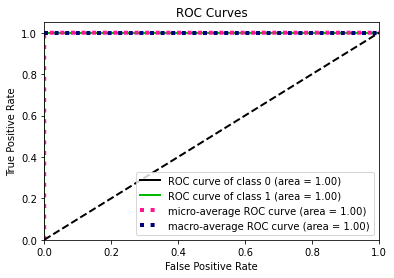

In [65]:
# First calculate probability
prob = random_forest.predict_proba(x_test)
skplt.metrics.plot_roc(rm_pred,prob)
plt.show()

Conclusion : DecisionTreeClassifier model has 80% Cross Validation score 

In [66]:
#Now we find ROC, AUC score

In [67]:
# LogisticRegression
roc_auc_score(y_test, log.predict(x_test))

0.7397271952259165

In [68]:
# Knn Classifier
roc_auc_score(y_test,knn.predict(x_test))


0.7637254901960785

In [69]:
# DecisionTreeClassifier
roc_auc_score(y_test,decision_tree.predict(x_test))


0.7053282182438192

In [70]:
# RandomForestClassifier
roc_auc_score(y_test,random_forest.predict(x_test))

0.7053282182438192

In [71]:
###Let's check ROC, AUC Curve for the fitted model

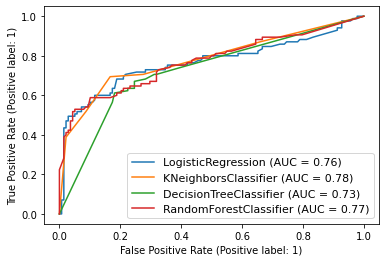

In [72]:
disp = plot_roc_curve(log, x_test, y_test)
plot_roc_curve(knn, x_test, y_test, ax = disp.ax_) # ax_ = Axes with confusion matrix
plot_roc_curve(decision_tree, x_test, y_test, ax = disp.ax_)
plot_roc_curve(random_forest, x_test, y_test, ax = disp.ax_)
plt.legend(prop = {'size':11}, loc = 'lower right')
plt.show()

Logistic regression has highest accuracy and highest cross validation score so we observed that logistic regression as best model Now we go for hyperparamter tunning

In [73]:
param = { 'penalty': ['l1','l2', 'elasticnet'],
            'C': np.logspace(-4,4,20),
         'max_iter':[100,150],
         'fit_intercept':[True,False]}

In [74]:
grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = param, cv = 5,n_jobs = -1 )

In [75]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'fit_intercept': [True, False], 'max_iter': [100, 150],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [76]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 4.281332398719396, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2'}


In [77]:
log = LogisticRegression(C = 0.03359818286283781, fit_intercept= True, max_iter = 100, penalty ='l2')

In [78]:
log.fit(x_train, y_train)
log.score(x_train, y_train)

0.8158682634730539

In [79]:
y_pred = log.predict(x_test)
cfm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred, digits = 2))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       138
           1       0.67      0.65      0.66        85

    accuracy                           0.74       223
   macro avg       0.73      0.73      0.73       223
weighted avg       0.74      0.74      0.74       223



##### After HyperparameterTuning model accuracy score 74% 

### Final Conclusion : Logistic Regression is our best model

#Saving the model
import joblib 
joblib.dump(log,'Titanic project.pkl")